<a href="https://colab.research.google.com/github/hermescosta/Hermes-2025-/blob/main/An%C3%A1lise_de_portf%C3%B3lio_RBras_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Este estudo teve início no meu primeiro ano da graduação em Bacharelado em Estatística, com o objetivo de aplicar técnicas estatísticas descritivas em um contexto prático e acessível. A análise foi conduzida com foco na visualização e interpretação de dados de um portfólio de ações, permitindo uma compreensão mais intuitiva dos padrões de comportamento dos ativos. O trabalho foi apresentado na RBras 2023, realizada na cidade de Londrina, destacando-se pela abordagem visual e pela capacidade de extrair insights relevantes mesmo com ferramentas estatísticas iniciais.

# **Análise de Portfólio**

# Introdução

No campo da avaliação de investimentos, a compreensão do nível de risco associado a um ativo desempenha um papel fundamental. O risco é um fator crucial na determinação da taxa de desconto utilizada para trazer os fluxos de caixa futuros a valor presente. A taxa de desconto, por sua vez, reflete o risco ao qual o capital investido está exposto em uma empresa, afetando diretamente a avaliação de projetos e a tomada de decisão dos investidores.

No contexto dos investimentos, o risco está intimamente relacionado à probabilidade real de obter um retorno inferior ao esperado. Os investidores, conscientes desse risco, exigem uma taxa de retorno maior para compensar a incerteza e o potencial de perdas. Essa relação positiva entre risco e retorno esperado implica que projetos com maior volatilidade esperada exigiriam um prêmio de risco maior para atrair investidores.


# Objetivo

 Calcular estatísticas descritivas, como volatilidade, matriz de correlação, índice de Sharp e VaR, a fim de ajudar os investidores a compreender os riscos e retornos envolvidos na seleção de uma carteira de investimentos e, assim, minimizar perdas.

 Inicialmente importamos as bilbiotecas necessarias:



*   YFinance: permite acessar dados financeiros do Yahoo Finance diretamente no Python.
*   NumPy: biblioteca para computação numérica.
*   Matplotlib: para visualização gráfica dos dados, permitindo criar gráficos de linha, barras, histogramas...
*   Pandas: manipulação e análise dos dados.
*   Seaborn: biblioteca baseada no Matplotlib que facilita a criação de gráficos estatísticos bonitos e informativos com menos código e integração direta com Pandas.








In [ ]:
# importar as bibliotecas
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


# Obtenção dos Dados

O portfólio analisado é composto pelos seguintes ativos da bolsa de valores brasileira: PETR4.SA, VALE3.SA, ITUB4.SA, BBDC4.SA e BBAS3.SA. Para cada um desses ativos, foram coletados os preços históricos de fechamento diário no período de 1º de janeiro de 2022 a 31 de dezembro de 2022. A coleta foi realizada utilizando a biblioteca yfinance, que permite acesso automatizado e direto à base de dados do Yahoo Finance, facilitando o processo de extração e manipulação das séries temporais financeiras.

Definimos abaixo o período de análise, que compreende do início ao fim do ano de 2022.
Essas datas serão utilizadas para filtrar os dados históricos de cada ativo.

In [ ]:
# período de tempo
data_inicio = '2022-01-01'
data_fim = '2022-12-31'


Selecionamos os ativos que compõem o portfólio a ser analisado.
 Cada código representa uma ação negociada na B3.

In [ ]:
# ações do portfólio
acoes = ['PETR4.SA', 'VALE3.SA', 'ITUB4.SA', 'BBDC4.SA', 'BBAS3.SA']


Utilizamos a função "download" da biblioteca yfinance para obter dados historicos, dos preços de fechamento das ações.

In [ ]:
# dados históricos
dados = yf.download(acoes, start=data_inicio, end=data_fim)


/tmp/ipython-input-1658336929.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  dados = yf.download(acoes, start=data_inicio, end=data_fim)
[*********************100%***********************]  5 of 5 completed


Quantidade de linhas e colunas existentes

In [ ]:
# linhas e colunas existentes
dados.shape


(250, 25)

Vizualização do inicio DataFrame

In [ ]:
# inicio dados
dados.head()


Price           Close                                                   High  \
Ticker       BBAS3.SA   BBDC4.SA   ITUB4.SA   PETR4.SA   VALE3.SA   BBAS3.SA   
Date                                                                           
2022-01-03  11.162105  14.137689  15.603595  10.602620  55.808090  11.526171   
2022-01-04  11.173724  14.230380  16.046095  10.642714  55.149857  11.289915   
2022-01-05  10.987817  14.129759  15.741422  10.230852  55.672157  11.224072   
2022-01-06  11.076897  14.330997  16.060602  10.223564  56.795475  11.177596   
2022-01-07  11.088516  14.539422  16.416052  10.270946  60.101032  11.162104   

Price                                                   ...       Open  \
Ticker       BBDC4.SA   ITUB4.SA   PETR4.SA   VALE3.SA  ...   BBAS3.SA   
Date                                                    ...              
2022-01-03  14.302832  15.821219  10.650002  57.217603  ...  11.282169   
2022-01-04  14.316625  16.089619  10.715608  56.573677  ...  11.278296   
2022-01-05  14.316623  16.118637  10.668224  56.294634  ...  11.162103   
2022-01-06  14.366933  16.133144  10.442250  57.489500  ...  11.007182   
2022-01-07  14.539422  16.430559  10.311038  60.101032  ...  11.080771   

Price                                                     Volume             \
Ticker       BBDC4.SA   ITUB4.SA   PETR4.SA   VALE3.SA  BBAS3.SA   BBDC4.SA   
Date                                                                          
2022-01-03  13.936645  15.356956  10.402158  56.523579  32338600   35620970   
2022-01-04  14.144135  15.683389  10.628134  56.173005  23429600  110060060   
2022-01-05  14.194442  16.024332  10.639066  55.357346  26325600   45808070   
2022-01-06  14.079449  15.697898  10.311039  56.266015  20271000   36651120   
2022-01-07  14.352558  16.024330  10.245432  57.525275  16377400   84778540   

Price                                     
Ticker      ITUB4.SA  PETR4.SA  VALE3.SA  
Date                                      
2022-01-03  36138190  52704700  18557200  
2022-01-04  48343460  51739200  18178700  
2022-01-05  34807190  78459800  22039000  
2022-01-06  39441490  61163100  22044100  
2022-01-07  47174930  47507600  35213100  

[5 rows x 25 columns]

Visualização do final do DataFrame

In [ ]:
# final dados
dados.tail()


Price           Close                                                   High  \
Ticker       BBAS3.SA   BBDC4.SA   ITUB4.SA   PETR4.SA   VALE3.SA   BBAS3.SA   
Date                                                                           
2022-12-23  14.966253  12.227033  18.999538  14.665116  67.689163  15.118970   
2022-12-26  14.945042  11.936296  18.622416  14.560030  68.308655  15.089274   
2022-12-27  14.448712  11.879763  18.516815  14.659276  69.939720  15.038369   
2022-12-28  14.707481  12.243181  18.893942  14.478295  69.782883  14.762630   
2022-12-29  14.732936  12.235107  18.856222  14.303158  69.696625  14.864443   

Price                                                   ...       Open  \
Ticker       BBDC4.SA   ITUB4.SA   PETR4.SA   VALE3.SA  ...   BBAS3.SA   
Date                                                    ...              
2022-12-23  12.340096  19.240898  14.723496  67.845994  ...  14.648093   
2022-12-26  12.218956  18.991999  14.770198  68.645846  ...  15.089274   
2022-12-27  12.097814  18.652581  14.776036  70.300436  ...  15.038369   
2022-12-28  12.299713  19.007080  14.781873  70.739566  ...  14.465680   
2022-12-29  12.501615  19.218261  14.624249  70.535682  ...  14.775358   

Price                                                     Volume            \
Ticker       BBDC4.SA   ITUB4.SA   PETR4.SA   VALE3.SA  BBAS3.SA  BBDC4.SA   
Date                                                                         
2022-12-23  12.073589  18.878859  14.087151  66.873630  17488800  21104200   
2022-12-26  12.186652  18.818521  14.665115  67.767579   9105400  13937200   
2022-12-27  12.065510  18.599783  14.741008  69.006561  17731600  78235200   
2022-12-28  11.912066  18.667668  14.653437  69.939719  21450400  45117800   
2022-12-29  12.315868  19.037242  14.589221  69.790727  18673000  41911700   

Price                                     
Ticker      ITUB4.SA  PETR4.SA  VALE3.SA  
Date                                      
2022-12-23  27860030  68387900  18656500  
2022-12-26  17303880  28765200  18407500  
2022-12-27  18923960  50803200  26720300  
2022-12-28  24966040  57293500  23314500  
2022-12-29  27279670  57901800  40110800  

[5 rows x 25 columns]

In [ ]:
dados.columns

MultiIndex([( 'Close', 'BBAS3.SA'),
            ( 'Close', 'BBDC4.SA'),
            ( 'Close', 'ITUB4.SA'),
            ( 'Close', 'PETR4.SA'),
            ( 'Close', 'VALE3.SA'),
            (  'High', 'BBAS3.SA'),
            (  'High', 'BBDC4.SA'),
            (  'High', 'ITUB4.SA'),
            (  'High', 'PETR4.SA'),
            (  'High', 'VALE3.SA'),
            (   'Low', 'BBAS3.SA'),
            (   'Low', 'BBDC4.SA'),
            (   'Low', 'ITUB4.SA'),
            (   'Low', 'PETR4.SA'),
            (   'Low', 'VALE3.SA'),
            (  'Open', 'BBAS3.SA'),
            (  'Open', 'BBDC4.SA'),
            (  'Open', 'ITUB4.SA'),
            (  'Open', 'PETR4.SA'),
            (  'Open', 'VALE3.SA'),
            ('Volume', 'BBAS3.SA'),
            ('Volume', 'BBDC4.SA'),
            ('Volume', 'ITUB4.SA'),
            ('Volume', 'PETR4.SA'),
            ('Volume', 'VALE3.SA')],
           names=['Price', 'Ticker'])

In [ ]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 250 entries, 2022-01-03 to 2022-12-29
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (Close, BBAS3.SA)   250 non-null    float64
 1   (Close, BBDC4.SA)   250 non-null    float64
 2   (Close, ITUB4.SA)   250 non-null    float64
 3   (Close, PETR4.SA)   250 non-null    float64
 4   (Close, VALE3.SA)   250 non-null    float64
 5   (High, BBAS3.SA)    250 non-null    float64
 6   (High, BBDC4.SA)    250 non-null    float64
 7   (High, ITUB4.SA)    250 non-null    float64
 8   (High, PETR4.SA)    250 non-null    float64
 9   (High, VALE3.SA)    250 non-null    float64
 10  (Low, BBAS3.SA)     250 non-null    float64
 11  (Low, BBDC4.SA)     250 non-null    float64
 12  (Low, ITUB4.SA)     250 non-null    float64
 13  (Low, PETR4.SA)     250 non-null    float64
 14  (Low, VALE3.SA)     250 non-null    float64
 15  (Open, BBAS3.SA)    250 non-null    fl

Error in callback <function _draw_all_if_interactive at 0x7fa860db1300> (for post_execute):


KeyboardInterrupt: 

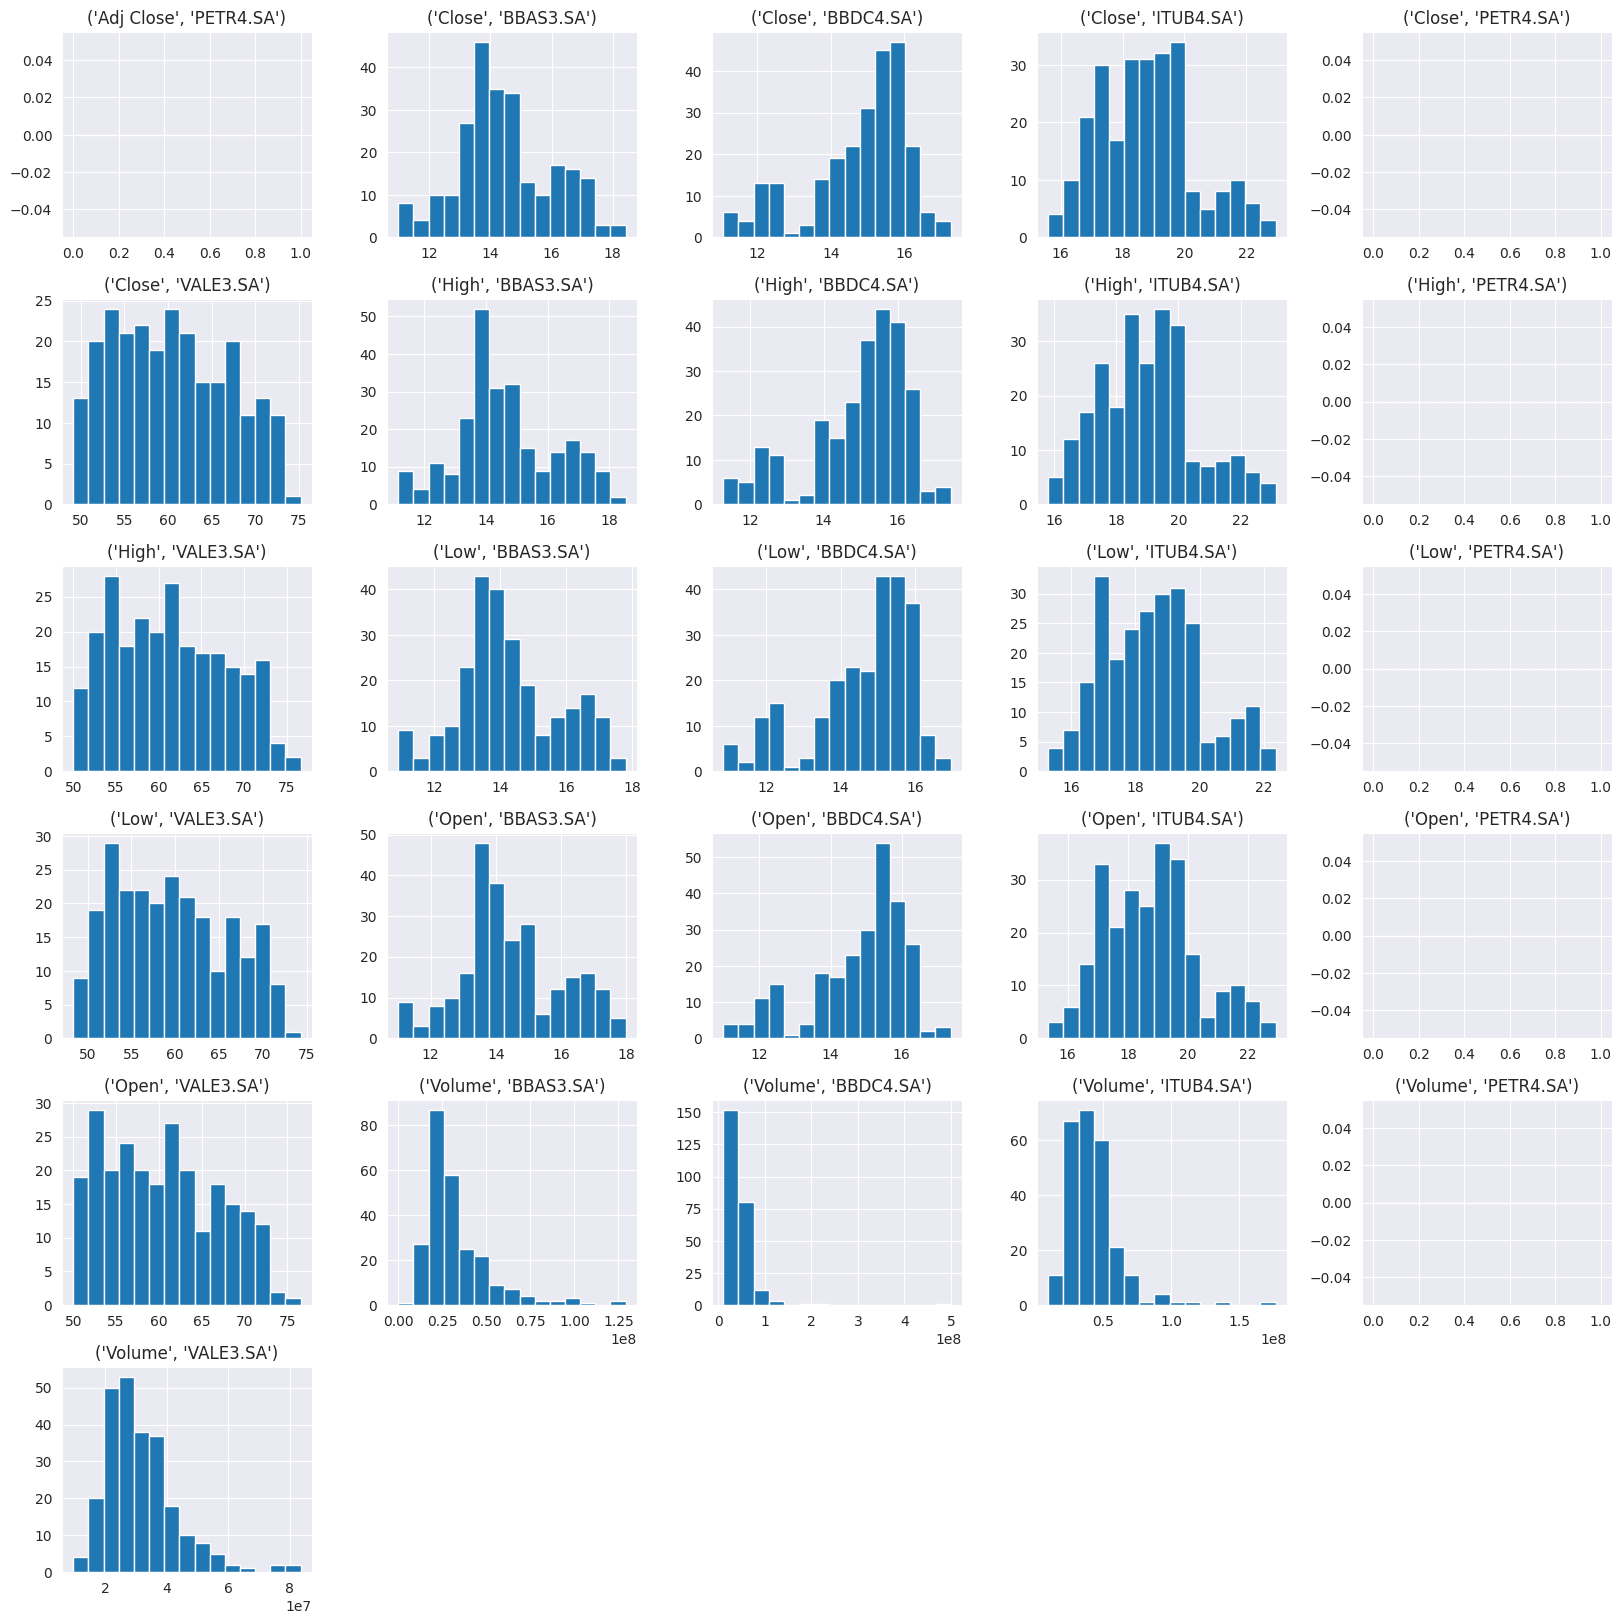

In [ ]:

# plotar o histograma das variáveis numéricas
sns.set_style('darkgrid')
dados.hist(bins=15,figsize=(20,20));


# Análises

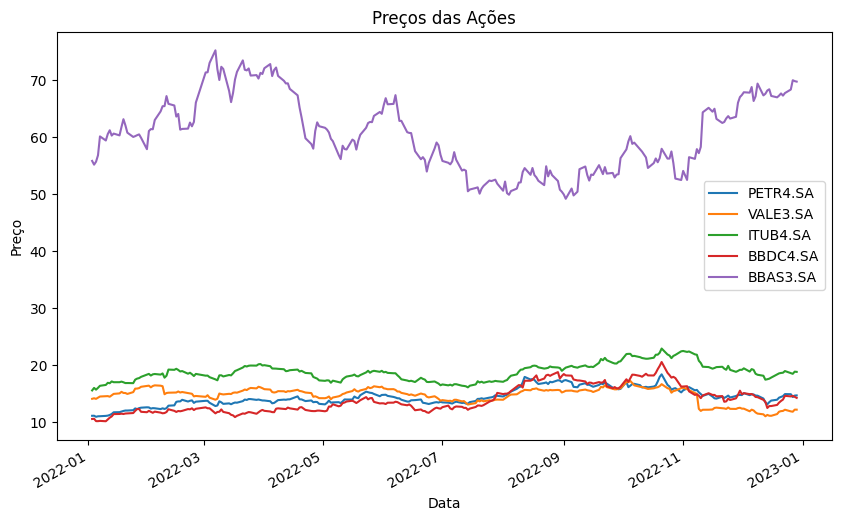

In [ ]:
# Gráfico de preços das ações
dados['Close'].plot(title='Preços das Ações', figsize=(10, 6))
plt.ylabel('Preço')
plt.xlabel('Data')
plt.legend(acoes)
plt.show()

Em seguida, calcula-se a variação percentual diária do preço de cada ação, a qual é essencial para os cálculos das estatísticas descritivas

A variação percentual é dada por $ \frac{\text{Preço atual} - \text{Preço anterior}}{\text{Preço anterior}} $.


In [ ]:

# Calcular os retornos percentuais diários
retornos = dados['Close'].pct_change()


Podendo ser calculadas a partir do desvio padrão, das variações percentuais diárias de cada ativo, indicando a magnitude da flotação do ativo em um determinado período de tempo, temos a volatilidade e seus respectivos resultados.

In [ ]:

# Calcular a volatilidade (desvio padrão) dos retornos
volatilidades = retornos.std()


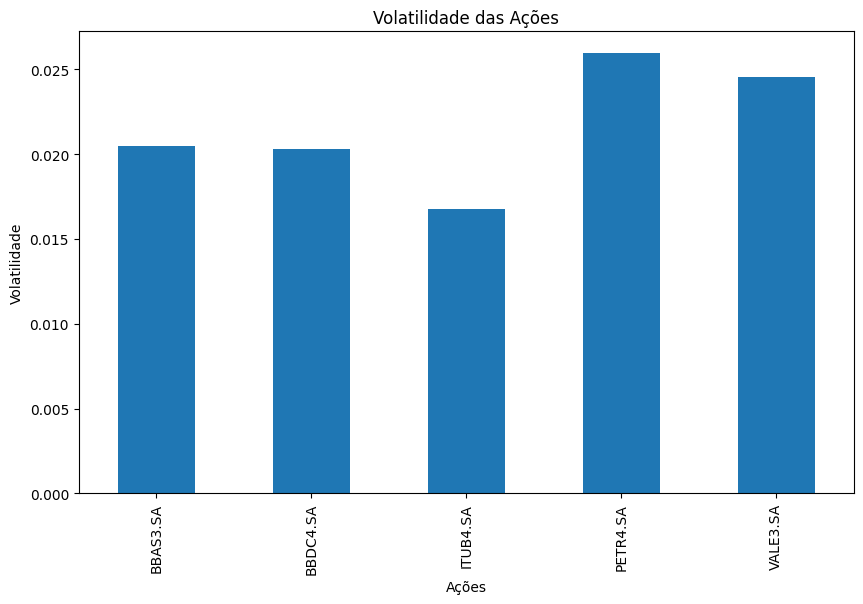

In [ ]:
# Gráfico de volatilidade das ações
volatilidades.plot(kind='bar', title='Volatilidade das Ações', figsize=(10, 6))
plt.ylabel('Volatilidade')
plt.xlabel('Ações')
plt.show()



O grau de relacionamento entre duas variáveis, é determinado pelo coeficiente de Pearson, sendo o necessário para o cálculo, da matriz de correlação, a qual, permite uma boa visualização, da existência de uma correlação forte e positiva entre duas variáveis.    


In [ ]:

# Calcular a matriz de correlação dos retornos
matriz_correlacao = retornos.corr()


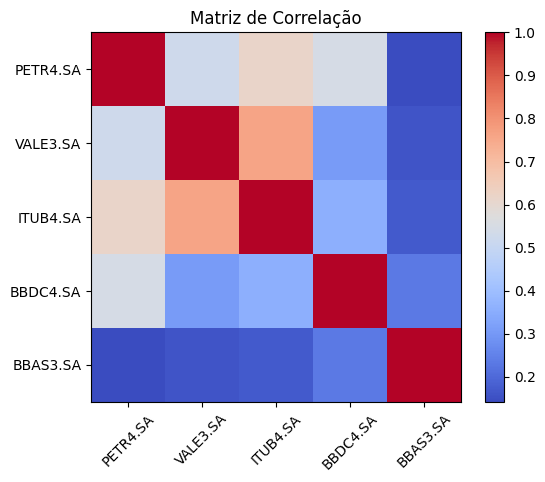

In [ ]:
# Gráfico de matriz de correlação
plt.imshow(matriz_correlacao, cmap='coolwarm', interpolation='nearest')
plt.title('Matriz de Correlação')
plt.colorbar()
tick_marks = np.arange(len(acoes))
plt.xticks(tick_marks, acoes, rotation=45)
plt.yticks(tick_marks, acoes)
plt.show()

In [ ]:
# Calcular a covariância dos retornos
covariancia = retornos.cov()

# Supondo que você já tenha os pesos das ações em um vetor
pesos = np.array([0.2, 0.2, 0.2, 0.2, 0.2])

risco_sistematico = np.dot(pesos.T, np.dot(covariancia, pesos))
desvio_padrao_combinado = np.sqrt(risco_sistematico)

retorno_esperado = 0.1
retorno_livre_risco = 0.05

sharpe_ratio = (retorno_esperado - retorno_livre_risco) / desvio_padrao_combinado

nivel_confianca = 0.95
horizonte_tempo = 1  # Em dias

var = desvio_padrao_combinado * np.percentile(retornos.sum(axis=1), (1 - nivel_confianca) * 100) * np.sqrt(horizonte_tempo)
print(sharpe_ratio)

3.3066176821907387


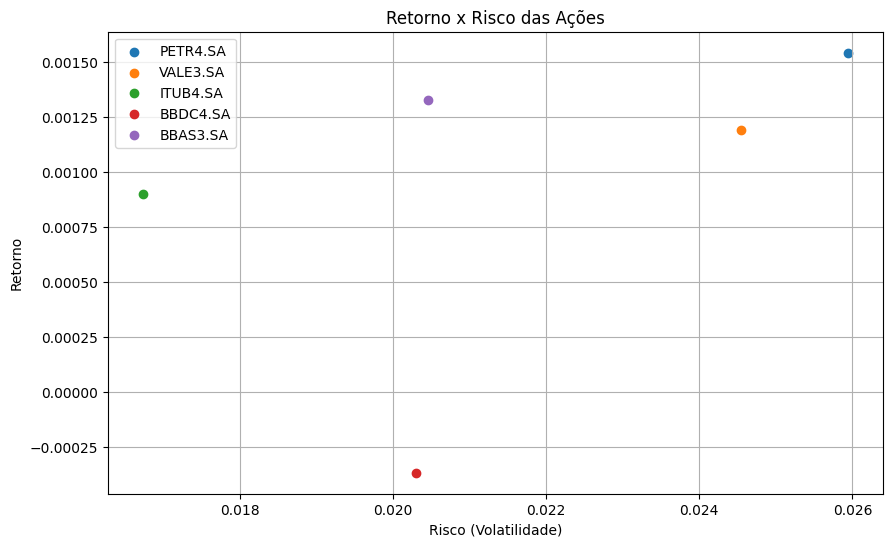

In [ ]:
# Calcular a volatilidade (desvio padrão) dos retornos
volatilidades = retornos.std()

# Plotar o gráfico de retorno x risco para cada ação
plt.figure(figsize=(10, 6))
for i in range(len(acoes)):
    retorno = np.mean(retornos[acoes[i]])  # Retorno médio da ação
    risco = volatilidades[acoes[i]]  # Volatilidade da ação
    plt.scatter(risco, retorno, label=acoes[i])

plt.xlabel('Risco (Volatilidade)')
plt.ylabel('Retorno')
plt.title('Retorno x Risco das Ações')
plt.legend()
plt.grid(True)
plt.show()

# Conclusões

Portanto, com essa análise, foi possível evidenciar dentro do portfólio e períodos escolhidos, quais seriam os ativos que teriam uma tendência de comportamento mais parecida e tomar as devidas precações para que o risco do portfólio seja minimizado a fim de obter o maior retorno possível com o menor risco evidente.